In [1]:
import numpy as np
import numpy.random as npr
import cvxpy as cp
import time
import matplotlib.pyplot as plt

from formulations import *

import os
import imageio

## Small Experiment (m = 30,n = 8), trials = 10

In [16]:
m = 20
n = 5
trials = 5
Data_mat = np.zeros((trials, m + 1))
Data_mat_lp = np.zeros((trials, m + 1))
Data_mat_sdp = np.zeros((trials, m + 1))

Data_col = np.zeros((trials, m + 1))
Data_col_lp = np.zeros((trials, m + 1))
Data_col_sdp = np.zeros((trials, m + 1))

x_true_mat = np.zeros((m+1,n))
x_lp_mat = np.zeros((m+1,n))

npr.seed(2)
K_mat = rand_01_mat(m,n)
w = np.ones(n)
for r in range(m + 1):
    print("%.2f" %(r/(m)), end = "\r")
    for trial in range(trials):
        # K_mat = rand_01_mat(m,n)

        # K_col = rand_01_col_mat(m,n)
        # w = npr.randint(1,5,n)
        # Data_mat[trial,r], x_true_mat[r,:], _ = misp(K_mat,w,r)
        # Data_mat_lp[trial,r], x_lp_mat[r,:], _ = misp_lp(K_mat,w,r)
        # Data_mat_sdp[trial,r], _  = misp_sdp(K_mat,w,r)

        # Data_col[trial,r], _, _ = misp(K_col,w,r)
        # Data_col_lp[trial,r], _, _ = misp_lp(K_col,w,r)
        # Data_col_sdp[trial,r], _ = misp_sdp(K_col,w,r)

        #### GROUP ####
        Data_mat[trial,r], x_true_mat[r,:] = misp_grp(K_mat,w,r)
        Data_mat_lp[trial,r], x_lp_mat[r,:] = misp_grp_lp(K_mat,w,r)



## Compare Values for normal matrix

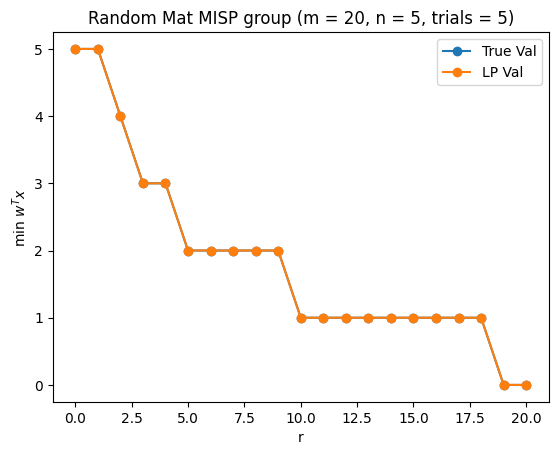

In [17]:
plt.plot(np.mean(Data_mat, axis=0),'o-', label="True Val")
plt.plot(np.mean(Data_mat_lp, axis=0),'o-',label="LP Val")
# plt.plot(np.mean(Data_mat_sdp, axis=0),label="SDP Val")
plt.xlabel("r")
plt.ylabel("min $w^T x$")
plt.title("Random Mat MISP group (m = {}, n = {}, trials = {})".format(m,n,trials))
plt.legend()

In [ ]:
Data_normed_lp = (np.mean(Data_mat, axis=0) - np.mean(Data_mat_lp, axis=0))/np.mean(Data_mat, axis=0)

plt.plot(Data_normed_lp,label="(True - LP)/(LP)")
plt.xlabel("r")
plt.ylabel("(TRUE- LP)/(LP)")
plt.title("Random Mat MISP (m = {}, n = {}, trials = {})".format(m,n,trials))
plt.legend()

In [ ]:
Data_normed_lp = (np.mean(Data_mat, axis=0) - np.mean(Data_mat_sdp, axis=0))/np.mean(Data_mat, axis=0)

plt.plot(Data_normed_lp,label="(True - SDP)/(SDP)")
plt.xlabel("r")
plt.ylabel("(TRUE- SDP)/(SDP)")
plt.title("Random Mat MISP (m = {}, n = {}, trials = {})".format(m,n,trials))
plt.legend()

## Plot for random col matrix

In [ ]:
plt.plot(np.mean(Data_col, axis=0),label="True Val")
plt.plot(np.mean(Data_col_lp, axis=0),label="LP Val")
plt.plot(np.mean(Data_col_sdp, axis=0),label="SDP Val")
plt.xlabel("r")
plt.ylabel("max $w^T x$")
plt.title("Random Col Mat MISP (m = {}, n = {}, trials = {})".format(m,n,trials))
plt.legend()

In [ ]:
Data_normed_lp_col = (np.mean(Data_col, axis=0) - np.mean(Data_col_lp, axis=0))/np.mean(Data_col, axis=0)

plt.plot(Data_normed_lp_col,label="(True - LP)/(LP)")
plt.xlabel("r")
plt.ylabel("(TRUE- LP)/(LP)")
plt.title("Random Col MISP (m = {}, n = {}, trials = {})".format(m,n,trials))
plt.legend()

In [ ]:
Data_normed_sdp_col = (np.mean(Data_col, axis=0) - np.mean(Data_col_sdp, axis=0))/np.mean(Data_col, axis=0)

plt.plot(Data_normed_lp_col,label="(True - SDP)/(SDP)")
plt.xlabel("r")
plt.ylabel("(TRUE- SDP)/(SDP)")
plt.title("Random Col MISP (m = {}, n = {}, trials = {})".format(m,n,trials))
plt.legend()

## Adding in Extra constraints